## 10.1. Introduction: Working with Data Files

So far, the data we have used in this book have all been either coded right into the program, or have been entered by the user. In real life data reside in files. For example the images we worked with in the image processing unit ultimately live in files on your hard drive. Web pages, and word processing documents, and music are other examples of data that live in files. In this short chapter we will introduce the Python concepts necessary to use data from files in our programs.

For our purposes, we will assume that our data files are text files–that is, files filled with characters. The Python programs that you write are stored as text files. We can create these files in any of a number of ways. For example, we could use a text editor to type in and save the data. We could also download the data from a website and then save it in a file. Regardless of how the file is created, Python will allow us to manipulate the contents.

In Python, we must open files before we can use them and close them when we are done with them. As you might expect, once a file is opened it becomes a Python object just like all other data. Table 1 shows the functions and methods that can be used to open and close files.

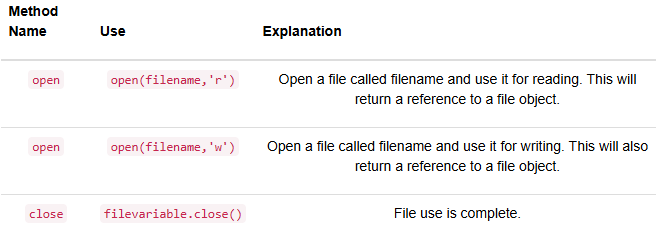



## 10.2. Reading a File

In [ ]:
fileref = open("requirements.txt","r")
content = fileref.read()
print(content[:200])
fileref.close()

In [12]:
fileref = open("requirements.txt","r")
lines = fileref.readlines()
print(lines[:10])
fileref.close()

['# SPDX-FileCopyrightText: Copyright (C) Siemens AG 2023\n', '#\n', '# SPDX-License-Identifier: MIT\n', '\n', '# direct dependencies\n', 'simaticai==2.2.0\n', '\n', 'matplotlib==3.7.5\n', 'numpy==1.24.2\n', 'opencv-python-headless==4.9.0.80\n']


In [ ]:
fileref = open("requirements.txt","r")
lines = fileref.readlines()
for lin in lines[:10]:
    print(lin.strip()) # strip - retira os espacos em branco
fileref.close()

In [ ]:
# nessa versao é possivel iterar por todo o texto como acima, porém não é possivel definir uma faixa especifica
# é a forma mais comum de uso 

fileref = open("requirements.txt","r")
#lines = fileref.readlines()
for lin in fileref:
    print(lin.strip()) # strip - retira os espacos em branco
fileref.close()

In [ ]:
# extrair o numero de linhas do arquivo

fileref = open("requirements.txt","r")
lines = fileref.readlines()
print(len(lines))
#for lin in lines[:10]:
#    print(lin.strip()) # strip - retira os espacos em branco
fileref.close()

81


In [ ]:
# extrair o numero de carcateres do arquivo

fileref = open("requirements.txt","r")
contents = fileref.read()
print(len(contents))
#for lin in lines[:10]:
#    print(lin.strip()) # strip - retira os espacos em branco
fileref.close()

1497


## 10.3. Alternative File Reading Methods
Once you have a file “object”, the thing returned by the open function, Python provides three methods to read data from that object. The read() method returns the entire contents of the file as a single string (or just some characters if you provide a number as an input parameter. The readlines method returns the entire contents of the entire file as a list of strings, where each item in the list is one line of the file. The readline method reads one line from the file and returns it as a string. The strings returned by readlines or readline will contain the newline character at the end. Table 2 summarizes these methods and the following session shows them in action.

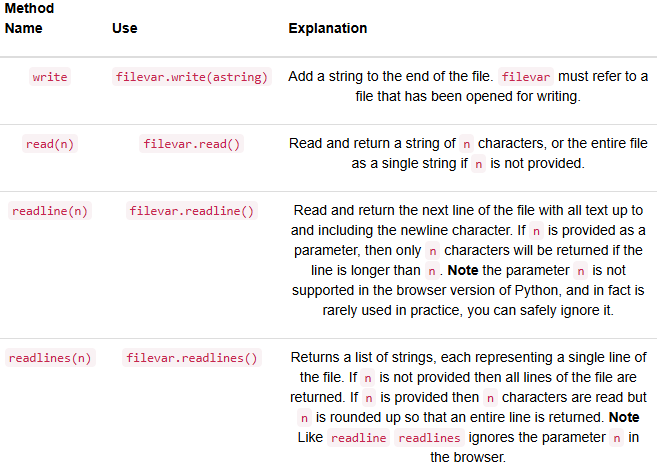

In this course, we will generally either iterate through the lines returned by readlines() with a for loop, or use read() to get all of the contents as a single string.

In other programming languages, where they don’t have the convenient for loop method of going through the lines of the file one by one, they use a different pattern which requires a different kind of loop, the while loop. Fortunately, you don’t need to learn this other pattern, and we will put off consideration of while loops until later in this course. We don’t need them for handling data from files.

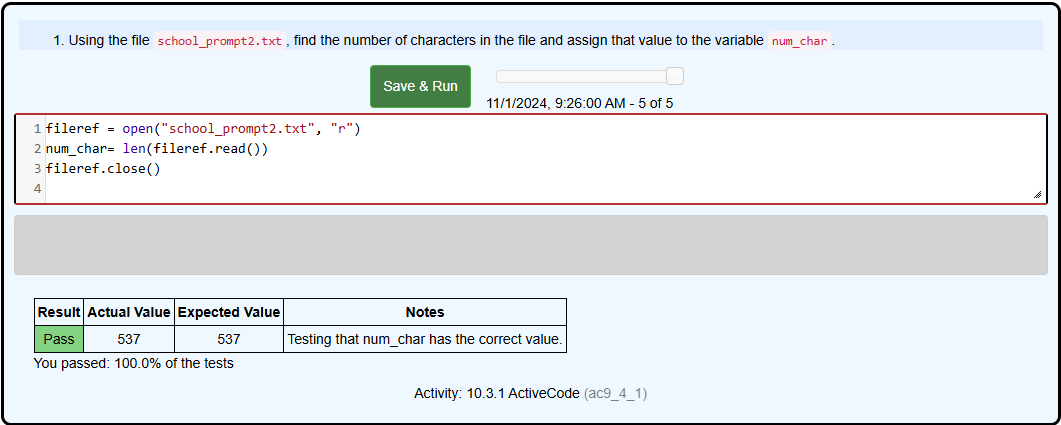

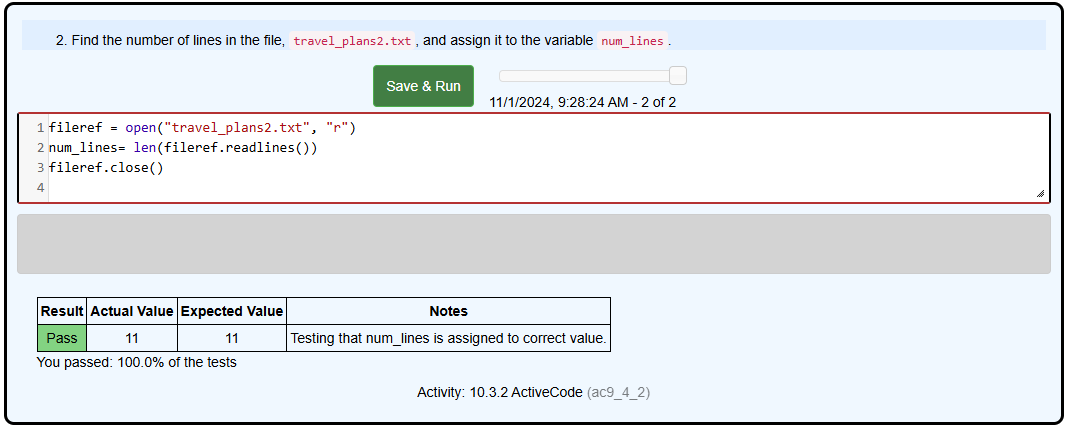

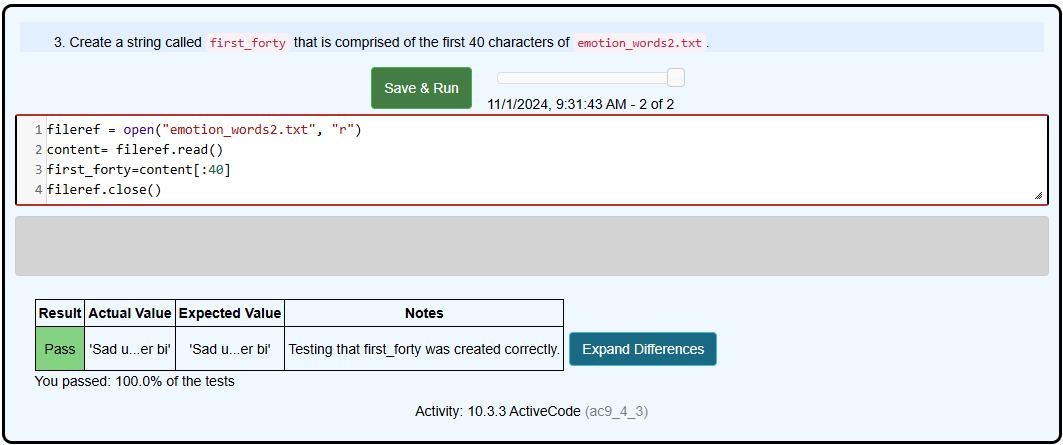

## 10.4. Iterating over lines in a file

We will now use this file as input in a program that will do some data processing. In the program, we will examine each line of the file and print it with some additional text. Because readlines() returns a list of lines of text, we can use the for loop to iterate through each line of the file.

A line of a file is defined to be a sequence of characters up to and including a special character called the newline character. If you evaluate a string that contains a newline character you will see the character represented as \n. If you print a string that contains a newline you will not see the \n, you will just see its effects (a carriage return).

As the for loop iterates through each line of the file the loop variable will contain the current line of the file as a string of characters. The general pattern for processing each line of a text file is as follows:

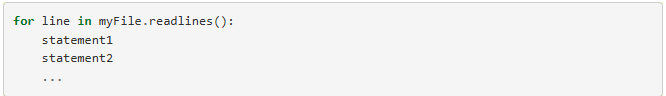

To process all of our olympics data, we will use a for loop to iterate over the lines of the file. Using the split method, we can break each line into a list containing all the fields of interest about the athlete. We can then take the values corresponding to name, team and event to construct a simple sentence.

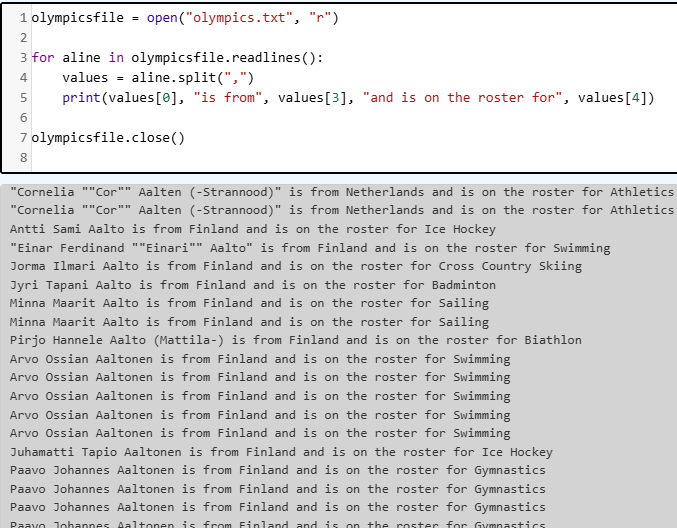

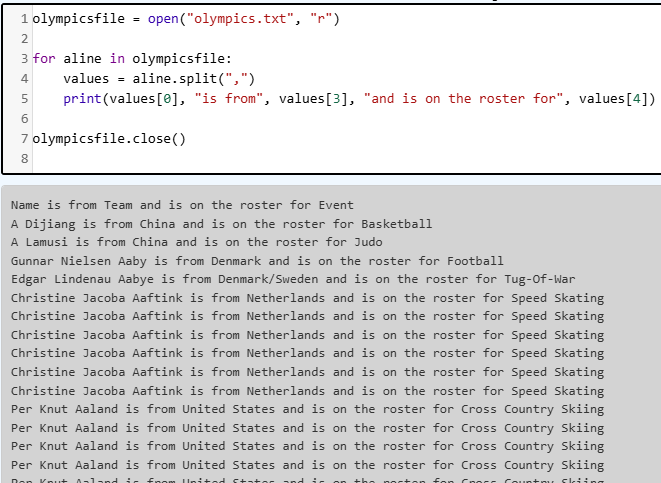

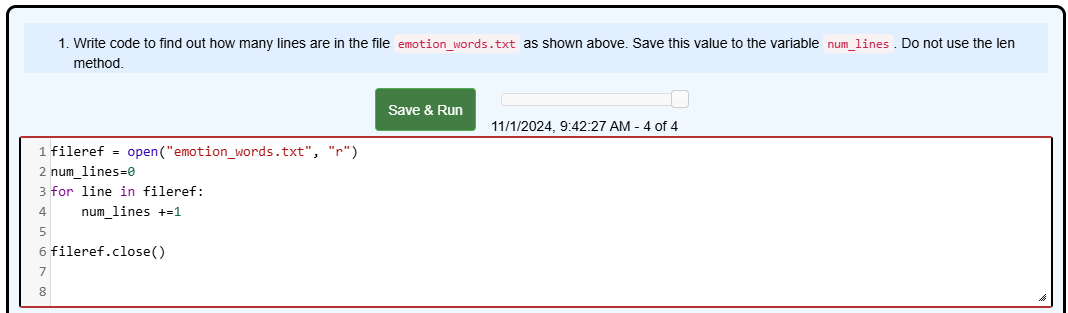



## 10.5. Finding a File in your Filesystem

In the examples we have provided, and in the simulated file system that we’ve built for this online textbook, all files sit in a single directory, and it’s the same directory where the Python program is stored. Thus, we can just write open('myfile.txt', 'r').

If you have installed Python on your local computer and you are trying to get file reading and writing operations to work, there’s a little more that you may need to understand. Computer operating systems (like Windows and the Mac OS) organize files into a hierarchy of folders, with some folders containing other folders.


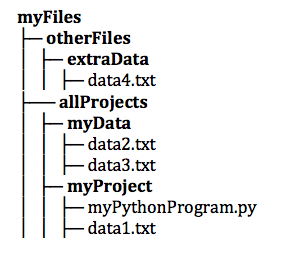

If your file and your Python program are in the same directory you can simply use the filename. For example, with the file hierarchy in the diagram, the file myPythonProgram.py could contain the code open('data1.txt', 'r').

If your file and your Python program are in different directories, however, then you need to specify a path. You can think of the filename as the short name for a file, and the path as the full name. Typically, you will specify a relative file path, which says where to find the file to open, relative to the directory where the code is running from. For example, the file myPythonProgram.py could contain the code open('../myData/data2.txt', 'r'). The ../ means to go up one level in the directory structure, to the containing folder (allProjects); myData/ says to descend into the myData subfolder.

There is also an option to use an absolute file path. For example, suppose the file structure in the figure is stored on a computer in the user’s home directory, /Users/joebob01/myFiles. Then code in any Python program running from any file folder could open data2.txt via open('/Users/joebob01/myFiles/allProjects/myData/data2.txt', 'r'). You can tell an absolute file path because it begins with a /. If you will ever move your programs and data to another computer (e.g., to share them with someone else), it will be much more convenient if your use relative file paths rather than absolute. That way, if you preserve the folder structure when moving everything, you won’t need to change your code. If you use absolute paths, then the person you are sharing with probably not have the same home directory name, /Users/joebob01/. Note that Python pathnames follow the UNIX conventions (Mac OS is a UNIX variant), rather than the Windows file pathnames that use : and \. The Python interpreter will translate to Windows pathnames when running on a Windows machine; you should be able to share your Python program between a Windows machine and a MAC without having to rewrite the file open commands.

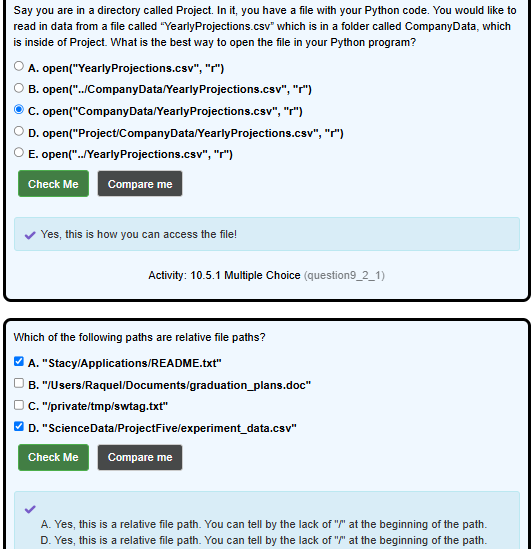

Em Python, **relative path** (ou "caminho relativo") é utilizado para apontar para arquivos ou pastas em relação ao diretório de onde o script está sendo executado. Aqui estão alguns exemplos práticos:

1. **Acessando um arquivo em uma subpasta**:
   ```python
   with open("subpasta/arquivo.txt", "r") as file:
       conteudo = file.read()
   ```
   Neste exemplo, o Python buscará o arquivo `arquivo.txt` dentro de uma pasta chamada `subpasta`, que deve estar no mesmo diretório onde o script está sendo executado.

2. **Voltando um nível no diretório**:
   ```python
   with open("../arquivo_no_diretorio_superior.txt", "r") as file:
       conteudo = file.read()
   ```
   Aqui, `../` é usado para indicar um nível acima do diretório atual, acessando um arquivo chamado `arquivo_no_diretorio_superior.txt`.

3. **Navegando múltiplos níveis**:
   ```python
   with open("../../outra_pasta/arquivo.txt", "r") as file:
       conteudo = file.read()
   ```
   Neste caso, `../../` retorna dois níveis acima do diretório atual, antes de descer até `outra_pasta` para encontrar `arquivo.txt`.


In [3]:
# exemplo 1
fileref = open("folder1/requirementsfolder.txt",'r')

# exemplo 2
fileref = open("../requirements2.txt",'r')




## os.path

O módulo `os` em Python é muito útil para manipulação de caminhos, especialmente quando queremos trabalhar com caminhos relativos. Ele permite criar caminhos portáteis entre diferentes sistemas operacionais, o que é essencial em ambientes de desenvolvimento e produção que podem ter estruturas de diretório diferentes. Vamos explorar algumas operações e exemplos práticos.

### 1. **Criando Caminhos Relativos com `os.path.join`**

A função `os.path.join` permite combinar partes de um caminho, garantindo que a formatação esteja correta, independentemente do sistema (Windows, Linux, etc.).

```python
import os

# Caminho relativo para um arquivo em uma subpasta
caminho_arquivo = os.path.join("subpasta", "arquivo.txt")
print(caminho_arquivo)
```

No Windows, `os.path.join` gerará `subpasta\arquivo.txt`, enquanto no Linux ou MacOS o resultado será `subpasta/arquivo.txt`.

### 2. **Movendo para Diretórios Superiores com `..`**

Para navegar para diretórios superiores, usamos `..`, que representa "um nível acima".

```python
# Caminho relativo para um arquivo em um diretório superior
caminho_arquivo = os.path.join("..", "arquivo_no_diretorio_superior.txt")
print(caminho_arquivo)
```

Esse caminho se refere a um arquivo que está um nível acima do diretório onde o script está sendo executado.

### 3. **Construindo Caminhos com Vários Níveis**

Você pode combinar múltiplas chamadas de `os.path.join` para criar caminhos mais complexos.

```python
# Caminho relativo para um arquivo em uma subpasta dentro de outra subpasta
caminho_arquivo = os.path.join("subpasta1", "subpasta2", "arquivo.txt")
print(caminho_arquivo)
```

Este exemplo cria o caminho `subpasta1/subpasta2/arquivo.txt`, que funciona em qualquer sistema operacional.

### 4. **Obtendo o Diretório Atual com `os.getcwd()`**

A função `os.getcwd()` retorna o diretório onde o script está sendo executado. É útil para construir caminhos relativos em relação ao diretório atual.

```python
# Caminho completo para um arquivo em uma subpasta
caminho_absoluto_arquivo = os.path.join(os.getcwd(), "subpasta", "arquivo.txt")
print(caminho_absoluto_arquivo)
```

Aqui, `os.getcwd()` fornece o diretório atual, e então o `os.path.join` anexa a subpasta e o arquivo.

### 5. **Obtendo o Diretório do Script com `os.path.dirname(__file__)`**

Quando o script está sendo executado de diferentes locais, `os.getcwd()` pode não refletir o local do script. Para obter o diretório do próprio script, usamos `os.path.dirname(__file__)`.

```python
# Diretório onde o script está localizado
diretorio_script = os.path.dirname(__file__)

# Caminho relativo ao local do script
caminho_arquivo = os.path.join(diretorio_script, "subpasta", "arquivo.txt")
print(caminho_arquivo)
```

Essa abordagem garante que o caminho seja relativo ao local do script, independentemente do local de execução.

### 6. **Verificando a Existência de Arquivos com `os.path.exists()`**

Antes de tentar acessar um arquivo, é boa prática verificar se ele existe. Isso evita erros de "arquivo não encontrado".

```python
caminho_arquivo = os.path.join("subpasta", "arquivo.txt")

# Verifica se o arquivo existe
if os.path.exists(caminho_arquivo):
    print("O arquivo existe!")
else:
    print("O arquivo não foi encontrado.")
```

### 7. **Navegando para Diretórios Superiores com `os.path.abspath`**

`os.path.abspath` converte um caminho relativo em um caminho absoluto, baseado no diretório atual.

```python
# Caminho absoluto para um arquivo que está dois níveis acima
caminho_relativo = os.path.join("..", "..", "arquivo.txt")
caminho_absoluto = os.path.abspath(caminho_relativo)
print(caminho_absoluto)
```

Este exemplo cria o caminho absoluto para `arquivo.txt`, que está dois níveis acima do diretório atual.

### 8. **Exemplo Prático: Manipulação de Arquivos com Caminhos Relativos**

Vamos unir algumas dessas funções em um exemplo prático:

```python
import os

# Diretório base relativo ao local do script
diretorio_base = os.path.dirname(__file__)

# Caminho para a pasta de dados
pasta_dados = os.path.join(diretorio_base, "dados")

# Caminho para o arquivo de dados
arquivo_dados = os.path.join(pasta_dados, "dados.txt")

# Verifica se o arquivo de dados existe
if os.path.exists(arquivo_dados):
    with open(arquivo_dados, "r") as file:
        conteudo = file.read()
        print("Conteúdo do arquivo:", conteudo)
else:
    print("O arquivo de dados não foi encontrado.")
```

Nesse exemplo:
- `os.path.dirname(__file__)` localiza o diretório do script.
- `os.path.join` cria o caminho relativo para a pasta `dados` e o arquivo `dados.txt`.
- `os.path.exists` verifica se o arquivo existe antes de abrir.

Essas técnicas com `os` são úteis para criar scripts mais portáveis e fáceis de manter, garantindo que o código funcione de maneira consistente em diferentes sistemas operacionais e estruturas de diretório.

In [ ]:
import os

caminho_arquivo = os.path.join("..", "requirements2.txt")
print(caminho_arquivo)

diretorio_base = os.path.dirname(__file__) # como não funciona em notebooks, somente em arquivo .py




## 10.8. Writing Text Files
One of the most commonly performed data processing tasks is to read data from a file, manipulate it in some way, and then write the resulting data out to a new data file to be used for other purposes later. To accomplish this, the open function discussed above can also be used to create a new file prepared for writing. Note in Table 1 that the only difference between opening a file for writing and opening a file for reading is the use of the 'w' flag instead of the 'r' flag as the second parameter. When we open a file for writing, a new, empty file with that name is created and made ready to accept our data. If an existing file has the same name, its contents are overwritten. As before, the function returns a reference to the new file object.

Table 2 shows one additional method on file objects that we have not used thus far. The write method allows us to add data to a text file. Recall that text files contain sequences of characters. We usually think of these character sequences as being the lines of the file where each line ends with the newline \n character. Be very careful to notice that the write method takes one parameter, a string. When invoked, the characters of the string will be added to the end of the file. This means that it is the programmer’s job to include the newline characters as part of the string if desired.

Assume that we have been asked to provide a file consisting of all the squared numbers from 1 to 12.

First, we will need to open the file. Afterwards, we will iterate through the numbers 1 through 12, and square each one of them. This new number will need to be converted to a string, and then it can be written into the file.

The program below solves part of the problem. We first want to make sure that we’ve written the correct code to calculate the square of each number.

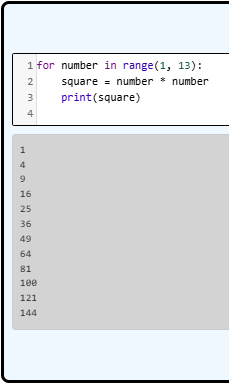

When we run this program, we see the lines of output on the screen. Once we are satisfied that it is creating the appropriate output, the next step is to add the necessary pieces to produce an output file and write the data lines to it. To start, we need to open a new output file by calling the open function, outfile = open("squared_numbers.txt",'w'), using the 'w' flag. We can choose any file name we like. If the file does not exist, it will be created. However, if the file does exist, it will be reinitialized as empty and you will lose any previous contents.

Once the file has been created, we just need to call the write method passing the string that we wish to add to the file. In this case, the string is already being printed so we will just change the print into a call to the write method. However, there is an additional step to take, since the write method can only accept a string as input. We’ll need to convert the number to a string. Then, we just need to add one extra character to the string. The newline character needs to be concatenated to the end of the line. The entire line now becomes outfile.write(str(square)+ '\n'). The print statement automatically outputs a newline character after whatever text it outputs, but the write method does not do that automatically. We also need to close the file when we are done.

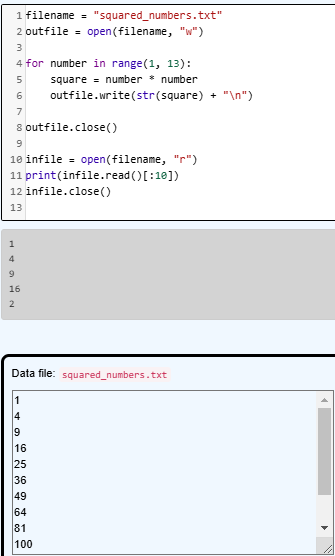

## 10.6. Using with for Files

Now that you have seen and practiced a bit with opening and closing files, there is another mechanism that Python provides for us that cleans up the often forgotten close. Forgetting to close a file does not necessarily cause a runtime error in the kinds of programs you typically write in an introductory programing course. However if you are writing a program that may run for days or weeks at a time that does a lot of file reading and writing you may run into trouble.

Python has the notion of a context manager that automates the process of doing common operations at the start of some task, as well as automating certain operations at the end of some task. For reading and writing a file, the normal operation is to open the file and assign it to a variable. At the end of working with a file the common operation is to make sure that file is closed.

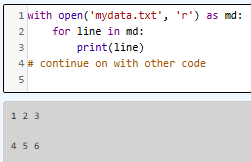

The first line of the with statement opens the file and assigns it to the variable md. Then we can iterate over the file in any of the usual ways. When we are done we simply stop indenting and let Python take care of closing the file and cleaning up.

This is equivalent to code that specifically closes the file at the end, but neatly marks the set of code that can make use of the open file as an indented block, and ensures that the programmer won’t forget to include the .close() invocation.

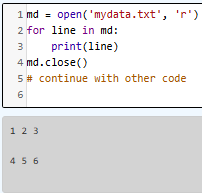

## 10.7. Recipe for Reading and Processing a File
Here’s a foolproof recipe for processing the contents of a text file. If you’ve fully digested the previous sections, you’ll understand that there are other options as well. Some of those options are preferable for some situations, and some are preferred by python programmers for efficiency reasons. In this course, though, you can always succeed by following this recipe.

1. Open the file using with and open.

2. Use .readlines() to get a list of the lines of text in the file.

3. Use a for loop to iterate through the strings in the list, each being one line from the file. On each iteration, process that line of text

4. When you are done extracting data from the file, continue writing your code outside of the indentation. Using with will automatically close the file once the program exits the with block.

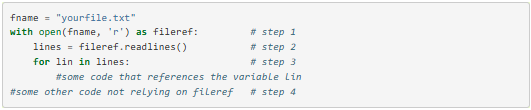

However, this will not be good to use when you are working with large data. Imagine working with a datafile that has 1000 rows of data. It would take a long time to read in all the data and then if you had to iterate over it, even more time would be necessary. This would be a case where programmers prefer another option for efficiency reasons.

This option involves iterating over the file itself while still iterating over each line in the file:

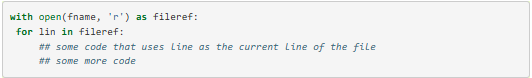

## 10.10. Reading in data from a CSV File
We are able to read in CSV files the same way we have with other text files. Because of the standardized structure of the data, there is a common pattern for processing it. To practice this, we will be using data about olympic events.

Typically, CSV files will have a header as the first line, which contains column names. Then, each following row in the file will contain data that corresponds to the appropriate columns.

All file methods that we have mentioned - read, readline, and readlines, and simply iterating over the file object itself - will work on CSV files. In our examples, we will iterate over the lines. Because the values on each line are separated with commas, we can use the .split() method to parse each line into a collection of separate value.

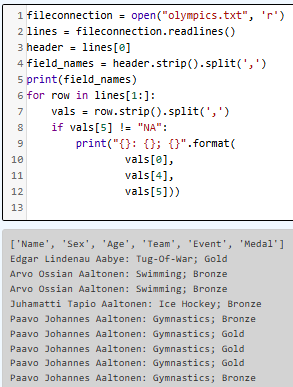

In the above code, we open the file, olympics.txt, which contains data on some olympians. The contents are similar to our previous olympics file, but include an extra column with information about medals they won.

We split the first row to get the field names. We split other rows to get values. Note that we specify to split on commas by passing that as a parameter. Also note that we first pass the row through the .strip() method to get rid of the trailing n.

Once we have parsed the lines into their separate values, we can use those values in the program. For example, in the code above, we select only those rows where the olympian won a medal, and we print out only three of the fields, in a different format.

Note that the trick of splitting the text for each row based on the presence of commas only works because commas are not used in any of the field values. Suppose that some of our events were more specific, and used commas. For example, “Swimming, 100M Freestyle”. How will a program processing a .csv file know when a comma is separating columns, and when it is just part of the text string giving a value within a column?

The CSV format is actually a little more general than we have described and has a couple of solutions for that problem. One alternative format uses a different column separator, such as | or a tab (\t). Sometimes, when a tab is used, the format is called tsv, for tab-separated values). If you get a file using a different separator, you can just call the .split('|') or .split('\t').

The other advanced CSV format uses commas to separate but encloses all values in double quotes.

For example, the data file might look like:

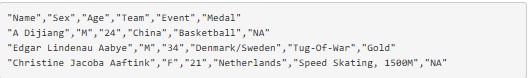

If you are reading a .csv file that has enclosed all values in double quotes, it’s actually a pretty tricky programming problem to split the text for one row into a list of values. You won’t want to try to do it directly. Instead, you should use python’s built-in csv module. However, there’s a bit of a learning curve for that, and we find that students gain a better understanding of reading CSV format by first learning to read the simple, unquoted format and split lines on commas.

## 10.11. Writing data to a CSV File
The typical pattern for writing data to a CSV file will be to write a header row and loop through the items in a list, outputting one row for each.

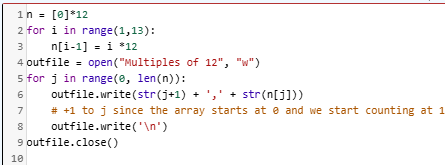

Here is a more complex example, where we a have a list of tuples, each representing one Olympian, a subset of the rows and columns from the file we have been reading from.

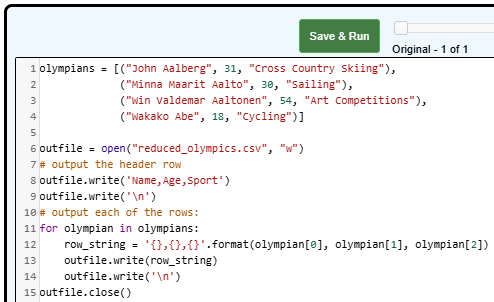

There are a few things worth noting in the code above.

First, using .format() makes it really clear what we’re doing when we create the variable row_string. We are making a comma separated set of values; the {} curly braces indicated where to substitute in the actual values. The equivalent string concatenation would be very hard to read. An alternative, also clear way to do it would be with the .join method: row_string = ','.join([olympian[0], str(olympian[1]), olympian[2]]).

Second, unlike the print statement, remember that the .write() method on a file object does not automatically insert a newline. Instead, we have to explicitly add the character \n at the end of each line.

Third, we have to explicitly refer to each of the elements of olympian when building the string to write. Note that just putting .format(olympian) wouldn’t work because the interpreter would see only one value (a tuple) when it was expecting three values to try to substitute into the string template. Later in the book we will see that python provides an advanced technique for automatically unpacking the three values from the tuple, with .format(*olympian).

As described previously, if one or more columns contain text, and that text could contain commas, we need to do something to distinguish a comma in the text from a comma that is separating different values (cells in the table). If we want to enclose each value in double quotes, it can start to get a little tricky, because we will need to have the double quote character inside the string output. But it is doable. Indeed, one reason Python allows strings to be delimited with either single quotes or double quotes is so that one can be used to delimit the string and the other can be a character in the string. If you get to the point where you need to quote all of the values, we recommend learning to use python’s csv module.



In [ ]:
olympians = [("John Aalberg", 31, "Cross Country Skiing"),
             ("Minna Maarit Aalto", 30, "Sailing"),
             ("Win Valdemar Aaltonen", 54, "Art Competitions"),
             ("Wakako Abe", 18, "Cycling")]

outfile = open("reduced_olympics.csv", "w")
# output the header row
outfile.write('Name,Age,Sport')
outfile.write('\n')
# output each of the rows:
for olympian in olympians:
    row_string = '{},{},{}'.format(olympian[0], olympian[1], olympian[2])
    outfile.write(row_string)
    outfile.write('\n')
outfile.close()






In [ ]:
olympians = [("John Aalberg", 31, "Cross Country Skiing"),
             ("Minna Maarit Aalto", 30, "Sailing"),
             ("Win Valdemar Aaltonen", 54, "Art Competitions"),
             ("Wakako Abe", 18, "Cycling")]

outfile = open("reduced_olympics.csv", "w")
# output the header row
outfile.write('Name,Age,Sport')
outfile.write('\n')
# output each of the rows:
for olympian in olympians:
    row_string = ','.join([olympian[0], str(olympian[1]), olympian[2]]) # só é possivel usar 'join' com strings
    outfile.write(row_string)
    outfile.write('\n')
outfile.close()

In [ ]:
# Pode-se usar essa opcao caos todos os itens seja do tipo string

olympians = [("John Aalberg", "31", "Cross Country Skiing"),
             ("Minna Maarit Aalto", '30', "Sailing"),
             ("Win Valdemar Aaltonen", '54', "Art Competitions"),
             ("Wakako Abe", '18', "Cycling")]

outfile = open("reduced_olympics.csv", "w")
# output the header row
outfile.write('Name,Age,Sport')
outfile.write('\n')
# output each of the rows:
for olympian in olympians:
    row_string = ','.join(olympian) # só é possivel usar 'join' com strings
    outfile.write(row_string)
    outfile.write('\n')
outfile.close()

TypeError: sequence item 1: expected str instance, int found